# Import Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load Dataset

In [3]:
dataset = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_16_KNN\Social_Network_Ads.csv')

In [4]:
dataset.shape

(400, 5)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Make Training and Testing Set

In [6]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [7]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [9]:
X[0:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]], dtype=int64)

In [10]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

<font color=red>__Split X and y into Training and Testing Set :__</font>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [18]:
X_train[0:10]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000]], dtype=int64)

In [19]:
y_train[0:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

<font color=red>__Feature Scaling :__</font>

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
for row in range(10):
    print( X_train[row] )

[1.92295008 2.14601566]
[2.02016082 0.3787193 ]
[-1.3822153 -0.4324987]
[-1.18779381 -1.01194013]
[ 1.92295008 -0.92502392]
[0.36757813 0.29180308]
[0.17315664 0.14694273]
[2.02016082 1.74040666]
[ 0.75642112 -0.83810771]
[ 0.27036739 -0.28763835]


In [26]:
for row in range(10):
    print( X_test[row] )

[-0.79895082  0.49460758]
[-0.02126485 -0.57735906]
[-0.31289709  0.14694273]
[-0.79895082  0.26283101]
[-0.31289709 -0.57735906]
[-1.09058306 -1.44652121]
[-0.70174008 -1.59138156]
[-0.21568634  2.14601566]
[-1.96547978 -0.05586178]
[ 0.85363187 -0.78016356]


# Fit Training Set on KNN Model

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=4, p=1)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

# Predict Test Data

In [38]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [39]:
y_pred.shape

(80,)

# Making the Confusion Matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 1 21]]


# Model Accuracy

In [32]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.95


# Classification Report

In [35]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [40]:
bias = knn_classifier.score(X_train,y_train)
bias

0.909375

In [41]:
variance = knn_classifier.score(X_test,y_test)
variance

0.95

# Visualising the Training Set Results

C:\Users\RAJEEV\AppData\Local\Temp\ipykernel_14932\2601500405.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


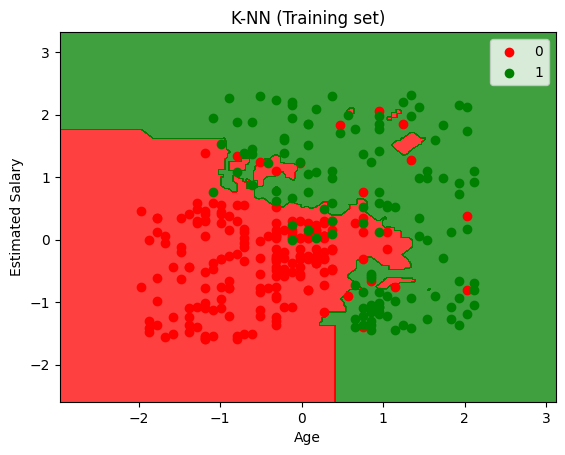

In [44]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(
    X1,
    X2,
    knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Testing Set Results

C:\Users\RAJEEV\AppData\Local\Temp\ipykernel_14932\1933886732.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


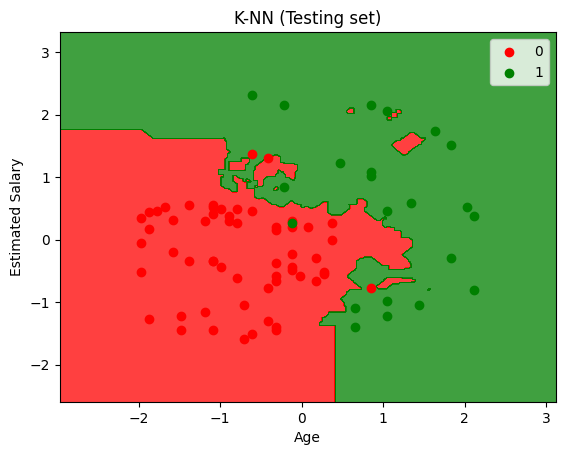

In [45]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(
    X1,
    X2,
    knn_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )

plt.title('K-NN (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()